<a href="https://colab.research.google.com/github/ces0157/AI_class_project/blob/Sarah/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
pip install scikit-learn

In [2]:
pip install datasets

In [ ]:
pip install nltk

In [3]:
#all nesseccary import statements
from datasets import load_dataset
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load Dataset

In [4]:
#load the dataset and split into testing and training
dataset = load_dataset("yelp_review_full")
dp_train = dataset['train'].to_pandas()
dp_test = dataset['test'].to_pandas()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
dp_train

,label,text
0,4,dr. goldberg offers everything i look for in a...
1,1,"Unfortunately, the frustration of being Dr. Go..."
2,3,Been going to Dr. Goldberg for over 10 years. ...
3,3,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...
...,...,...
649995,4,I had a sprinkler that was gushing... pipe bro...
649996,0,Phone calls always go to voicemail and message...
649997,0,Looks like all of the good reviews have gone t...
649998,4,I was able to once again rely on Yelp to provi...


# Functions

In [6]:
# Creates a count vectorizer with vocab from training data
def create_vectorizer(train_df, column_text):
    sentences = train_df[column_text].values
    vectorizer = CountVectorizer()

    df = train_df.drop(columns=[column_text])

    # fit the vocabulary to the text data
    vectorizer.fit(sentences)

    return vectorizer

In [7]:
# Passes in dataframe column, converts it a numpy array
# and performs the bag of word algorithm on it using vocab from training data
# Returns a sparse matrix
def create_bag_words(df, vectorizer, column_text):
    sentences = df[column_text].values
    df = df.drop(columns=[column_text])

    # create the bag-of-words model using previously-created vectorizer
    X = vectorizer.transform(sentences)

    return X

# Train Data

In [19]:
y_train = dp_train["label"].values

In [21]:
stop_words = set(stopwords.words('english'))

# Removes stop words from training data and makes everything lowercase
dp_train['no_stops'] = dp_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
dp_train['no_stops'] = dp_train['no_stops'].str.lower()

In [39]:
# create vectorizer consisting of vocab from training data
vectorizer = create_vectorizer(dp_train, "no_stops")

# Creates a set of new features modified to be a bag of words
X_fetaures_train = create_bag_words(dp_train, vectorizer, "no_stops")

In [41]:
print(X_fetaures_train.shape)

(650000, 242886)


In [42]:
# Preforms Logistic Regression on the dataset
lgr = LogisticRegression(max_iter=10000)
lgr.fit(X_fetaures_train, y_train)

LogisticRegression(max_iter=10000)

In [43]:
# Training on the prediction
predict_train = lgr.predict(X_fetaures_train)
print(classification_report(predict_train, y_train))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83    136082
           1       0.68      0.72      0.70    123271
           2       0.66      0.69      0.68    124840
           3       0.67      0.69      0.68    126131
           4       0.83      0.77      0.80    139676

    accuracy                           0.74    650000
   macro avg       0.74      0.74      0.74    650000
weighted avg       0.74      0.74      0.74    650000



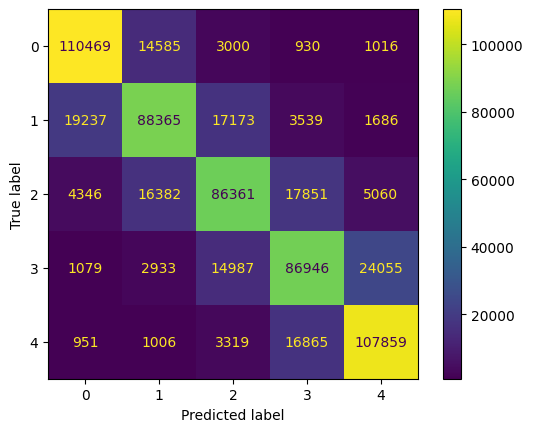

In [44]:
# Displays a confusion matrix based on the predicted vs actual values
cm = confusion_matrix(y_train, predict_train)
ConfusionMatrixDisplay(cm).plot()

# Test Data

In [45]:
y_test = dp_test["label"].values

In [46]:
# Removes stop words from test data and makes everything lowercase
dp_test['no_stops'] = dp_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
dp_test['no_stops'] = dp_test['no_stops'].str.lower()

In [47]:
# create vectorizer consisting of vocab from testing data
vectorizer = create_vectorizer(dp_test, "no_stops")

# Creates a set of new features modified to be a bag of words
X_features_test = create_bag_words(dp_test, vectorizer, "no_stops")

In [48]:
# Preforms Logistic Regression on the dataset
lgr = LogisticRegression(max_iter=10000)
lgr.fit(X_features_test, y_test)

LogisticRegression(max_iter=10000)

In [49]:
# Gets label predictions from test data and printing results
predict_test = lgr.predict(X_features_test)
print(classification_report(predict_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10196
           1       0.92      0.94      0.93      9826
           2       0.91      0.92      0.91      9801
           3       0.90      0.91      0.91      9862
           4       0.95      0.92      0.94     10315

    accuracy                           0.93     50000
   macro avg       0.93      0.93      0.93     50000
weighted avg       0.93      0.93      0.93     50000



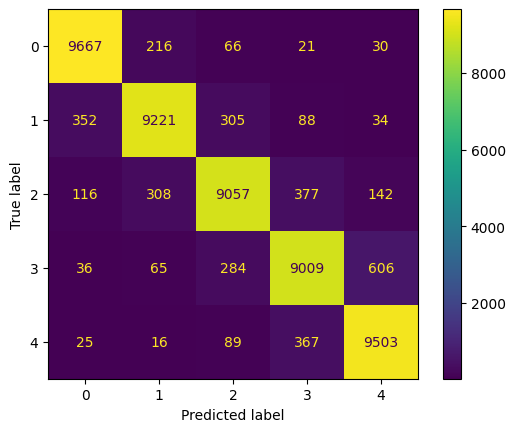

In [51]:
# Displays a confusion matrix based on the predicted vs actual values
cm = confusion_matrix(y_test, predict_test)
ConfusionMatrixDisplay(cm).plot()